<p align= " center"> <strong>DECISION TREE</p>
<p><b>By: Jefferson C.</b></p>

---

In [24]:
# Import data 
import pandas as pd 

# Original Data set 
data = pd.read_csv("NY-House-Dataset/NY-House-Dataset.csv")
# Clean Data (cuantitative variables )
reg_data = pd.read_csv("NY-House-Dataset/NY-House-Regression.csv")

reg_data.columns

Index(['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE',
       'LOG-PRICE', 'LOG-PROPERTYSQFT', 'SUBLOCALITY', 'TYPE', 'BOROUGH',
       'TYPE-GROUP', 'RESIDUALS', 'Y-HAT'],
      dtype='object')

In [167]:
# DECISION TREE 

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 

# Dummy Variables 
borought_dummies = pd.get_dummies(reg_data['BOROUGH'])
group_dummies = pd.get_dummies(reg_data['TYPE-GROUP'])

# Independent Varible
# ADdd dummy variables to X data frame 
X = pd.concat([reg_data[['LOG-PROPERTYSQFT','BATH']],borought_dummies,group_dummies],axis=1)

# Dependent Varible
Y = reg_data['LOG-PRICE']

# Training Data
# 80% Train  | 20% Test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42 ,shuffle = True)

# Decision Tree
decision_tree = DecisionTreeRegressor(max_depth=10, min_samples_split=50,min_samples_leaf=20,random_state=42)
display(decision_tree.fit(X_train,Y_train))

# Information About Decision Tree
print(f'DEPTH : {decision_tree.get_depth()}')
print(f'LEAVES : {decision_tree.get_n_leaves()}')

,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,50
,min_samples_leaf,20
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


DEPTH : 10
LEAVES : 98


In [168]:
# MODEL EVALUATION 

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# Predictions 
Y_train_pred = decision_tree.predict(X_train)
Y_test_pred = decision_tree.predict(X_test)

# R2 (Determination Coeficient)
r2_train =  r2_score(Y_train,Y_train_pred)
r2_test = r2_score(Y_test,Y_test_pred)

# Metrics
# MSE (Mean Square Error)
mse_train = mean_squared_error(Y_train,Y_train_pred)
mse_test = mean_squared_error(Y_test,Y_test_pred)

# RMSE (Root Mean Square Error)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# MAE (Mean absolute Error)
mae_train = mean_absolute_error(Y_train,Y_train_pred) 
mae_test = mean_absolute_error(Y_test,Y_test_pred)

# Results
metrics = {
    "METRIC": ["R2","MSE", "RMSE", "MAE"],
    "TRAIN": [round(r2_train, 3),round(mse_train, 2), round(rmse_train, 2), round(mae_train, 2)],
    "TEST": [round(r2_test, 3),round(mse_test, 2), round(rmse_test, 2), round(mae_test, 2)]
}
pd.DataFrame(metrics)

,METRIC,TRAIN,TEST
0,R2,0.754,0.734
1,MSE,0.260,0.280
2,RMSE,0.510,0.530
3,MAE,0.360,0.370


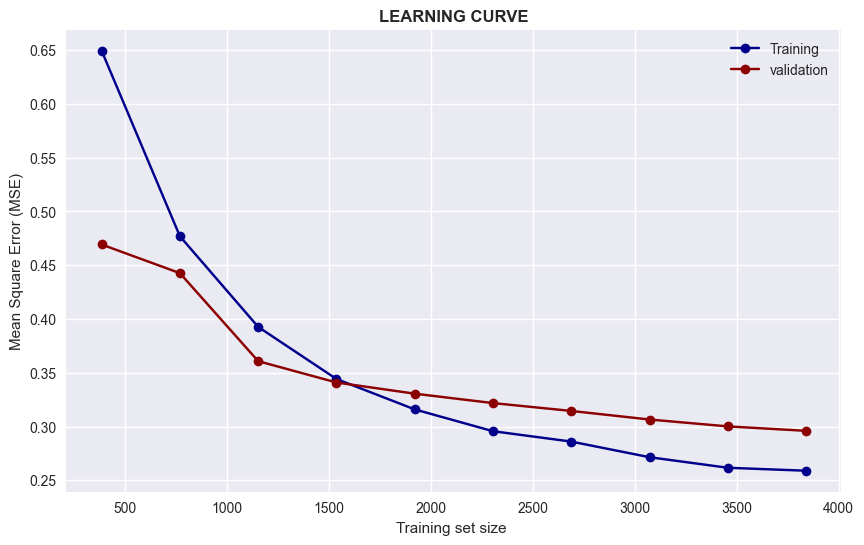

In [ ]:
# LEARNING CURVE
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Learning Curve 
train_sizes, train_scores, val_scores = learning_curve(
    # cv (cross - validation)
    decision_tree, X, Y, cv=5,  
    # Metric : MSE
    scoring='neg_mean_squared_error',
    # training size
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42
)

# Mean - Std error (training - validation)
train_errors = -train_scores.mean(axis=1)  # Convertimos de negativo a positivo
val_errors = -val_scores.mean(axis=1)

# GRAPH 
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_errors, label="Training", color='darkblue', marker='o')
plt.plot(train_sizes, val_errors, label="validation", color='darkred', marker='o')
plt.xlabel('Training set size ')
plt.ylabel('Mean Square Error (MSE)')
plt.title('LEARNING CURVE',fontweight = 'bold')
plt.legend()
plt.grid(True)
plt.show()

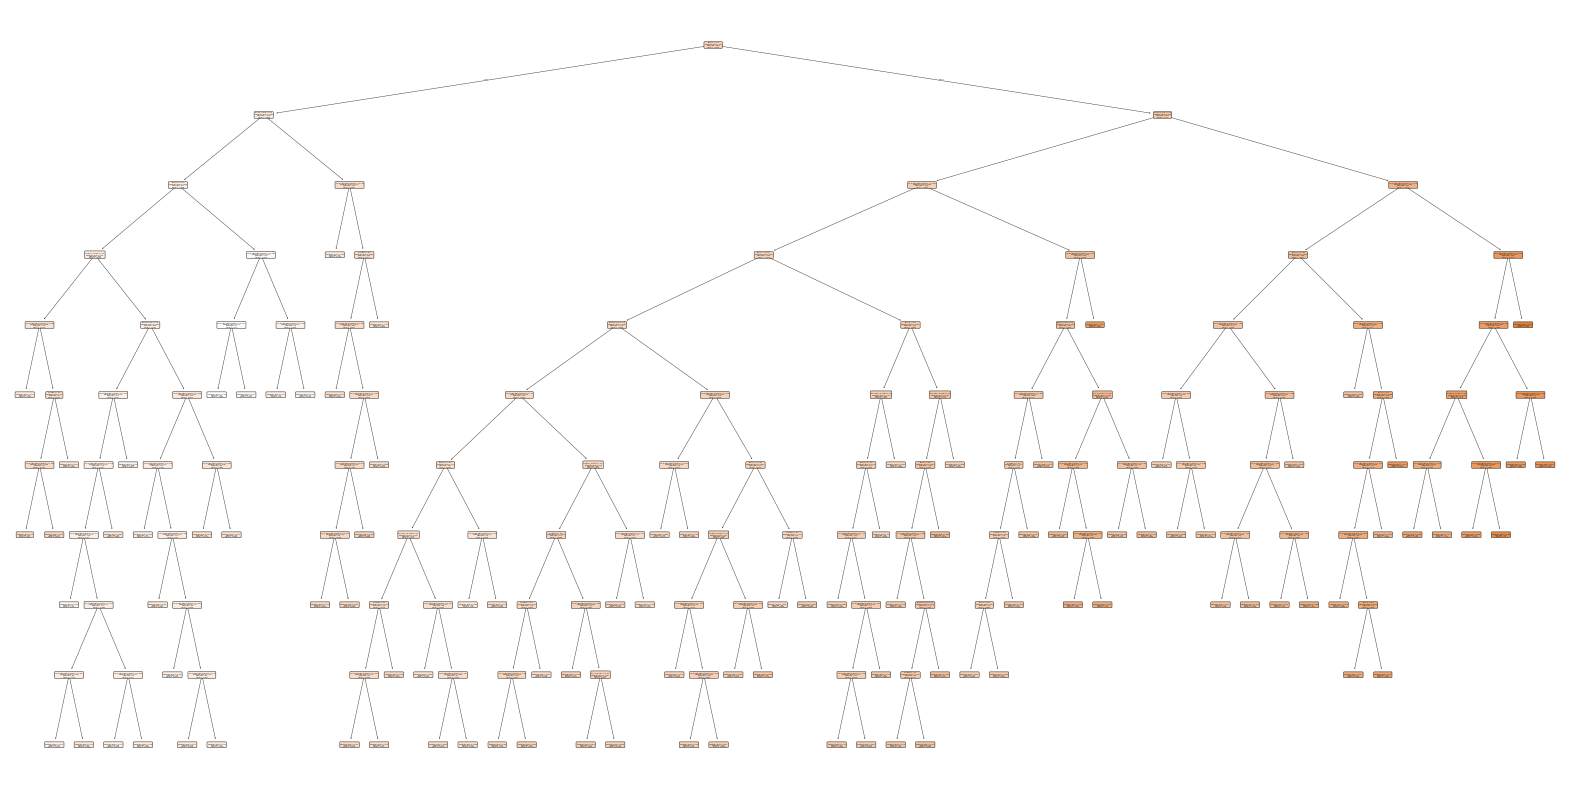

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualizar el árbol de decisión entrenado
plt.figure(figsize=(20,10))  # Ajustar el tamaño de la figura
plot_tree(decision_tree, 
          filled=True,        # Colorear los nodos según el valor de la variable
          feature_names=X.columns,  # Usar los nombres de las características
          rounded=True,       # Redondear los bordes de los nodos
          class_names=['Low', 'High'])  # Si tienes una variable categórica
plt.show()